<a href="https://colab.research.google.com/github/DataDrivenAkanksha/Sentiment_analysis_NLP-RNN/blob/main/Copy_of_NLP_RNN_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NLP RNN Assignment
Submitted by: Akanksha rawat

a) Explain the architecture of LSTM and GRU in detail. What were the shortcomings of RNN that were resolved by LSTM and GRU.

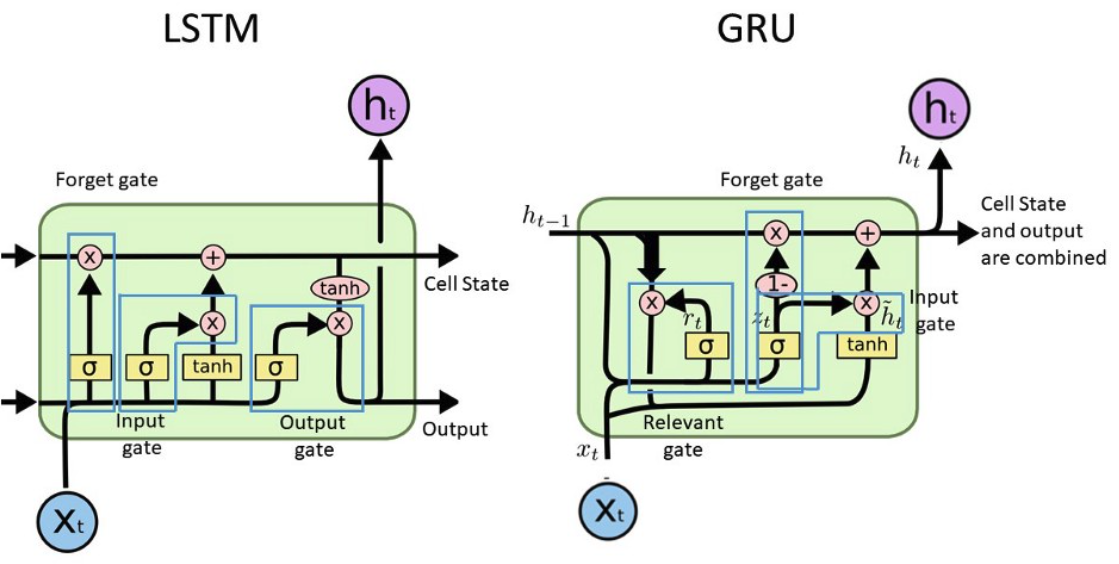

In [ ]:
from IPython.display import Image, display

display(Image(filename="/content/LSTM_GRU.png", width=400, height=250))


LSTM (Long Short-Term Memory)

LSTM is an advanced type of Recurrent Neural Network (RNN) designed to work with sequential data, such as time series or natural language. It effectively addresses the problem of short-term memory loss and vanishing gradients, which are common issues in traditional RNNs.

Key Features of LSTM:
It has two output states:
Output State (h<sub>t</sub>): Represents the current output.
Cell State (C<sub>t</sub>): Acts as a memory, retaining information over long periods.
Three Gates:
Forget Gate – Decides what information to discard from the cell state.
Input Gate – Decides which new information to add to the cell state.
Output Gate – Determines the final output.

Operations and Functions:
4 bitwise operations
5 activation functions (commonly sigmoid and tanh)
2 states for managing memory.

Use Case: LSTMs are highly effective in applications like text generation, speech recognition, language translation, and stock price prediction.

----------

GRU (Gated Recurrent Unit)
The GRU is a simplified variant of LSTM that offers comparable accuracy while being computationally more efficient and less time-consuming.

Key Features of GRU:
Maintains one state instead of two.
Two Gates:
Update Gate – Controls how much past information needs to be passed forward.
Reset Gate – Decides how to combine new input with the previous memory.
Three Operators for state transitions.

Three activation functions, typically including sigmoid and tanh.

Use Case: GRUs are suitable for real-time systems where speed and efficiency are crucial, such as chatbots and online recommendation systems.

-----

LSTM and GRU both solve the problem of vanishing gradient leading to short term memory loss which struggles in retaining the information in long sequneces in typical RNN.

b) Use the emotions detection dataset from below Kaggle link and create an end-to-end project on Jupyter/Colab to predict the person’s emotions.

https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp/data


i. Download the dataset from above link and load it in your Python environment.

ii. Perform the data cleaning like stopwords removal, lowercase, stemming, lemmatization etc.

iii. Perform feature engineering and word embedding techniques like TFIDF, word2Vec, Bag of words etc.

iv. Use the ML algorithms like logistic reg, DT, random forest etc. to predict the emotions.

v. Do the hyperparameter tuning to get the best model.

vi. Finally create a table to compare the performances of all the models and suggest the best model

In [ ]:
# connecting to the kaggle by using API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Loading the data from kaggle
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp


Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 265MB/s]


In [ ]:
# unzipping the data
!unzip emotions-dataset-for-nlp.zip


Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


Data Prepropcessing


In [ ]:
# converting train data into dataframe with labelling the columns

import pandas as pd



# Read the file WITHOUT header
df_train = pd.read_csv("/content/train.txt", sep=';', header=None)

# Manually assign column names
df_train.columns = ['text', 'label']

# Display
df_train.head()




,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [ ]:
df_test = pd.read_csv("/content/test.txt", sep=';',header=None)
df_test.columns = ['text', 'label']
df_test.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


In [ ]:
df_val = pd.read_csv("/content/val.txt", sep=';', header=None)
df_val.columns = ['text', 'label']
df_val.head()

,text,label
0,im feeling quite sad and sorry for myself but ...,sadness
1,i feel like i am still looking at a blank canv...,sadness
2,i feel like a faithful servant,love
3,i am just feeling cranky and blue,anger
4,i can have for a treat or if i am feeling festive,joy


Lowercasing the data

In [ ]:
#lowercase
import pandas as pd

df_train['text'] = df_train['text'].str.lower()
df_test['text'] = df_test['text'].str.lower()
df_val['text'] = df_val['text'].str.lower()

# verifying
df_train.head()


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Removing punctuation and numbers

Pattern [^\w\s]

\w → Matches word characters (letters, numbers, underscore).

\s → Matches whitespace (spaces, tabs, etc.).

[^...] → Negates the set, so it matches everything except words and spaces → i.e., punctuation.

In [ ]:
import string
df_train['text'] = df_train['text'].str.replace(r'[^\w\s]','',regex=True)
df_test['text'] = df_test['text'].str.replace(r'[^\w\s]','',regex=True)
df_val['text'] = df_val['text'].str.replace(r'[^\w\s]','',regex=True)
df_train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


Stopwords removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [ ]:
#stopwords removed from train, test and val dataset
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_val['text'] = df_val['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
df_train.head()

,text,label
0,didnt feel humiliated,sadness
1,go feeling hopeless damned hopeful around some...,sadness
2,im grabbing minute post feel greedy wrong,anger
3,ever feeling nostalgic fireplace know still pr...,love
4,feeling grouchy,anger


In [ ]:
#stemming
import nltk
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
df_train['text'] = df_train['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_val['text'] = df_val['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))
df_train.head()


,text,label
0,didnt feel humili,sadness
1,go feel hopeless damn hope around someon care ...,sadness
2,im grab minut post feel greedi wrong,anger
3,ever feel nostalg fireplac know still properti,love
4,feel grouchi,anger


Exploratory data analysis phase

1) Class distribution

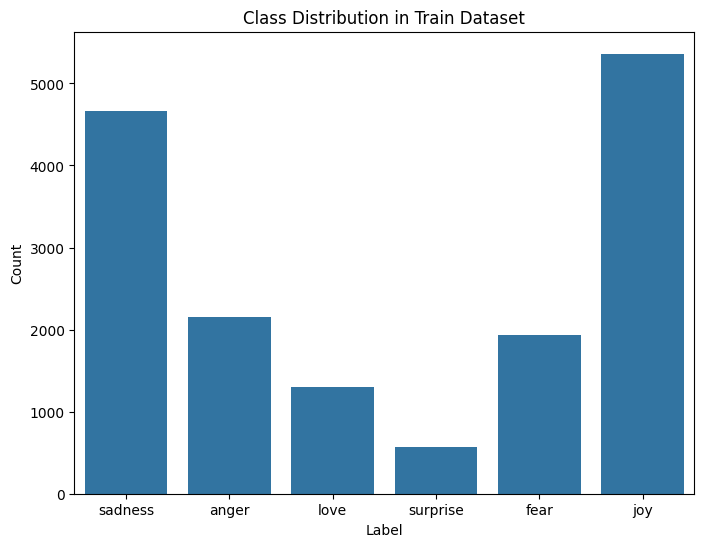

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(data=df_train, x='label')
plt.title('Class Distribution in Train Dataset')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

Text length distribution : word count

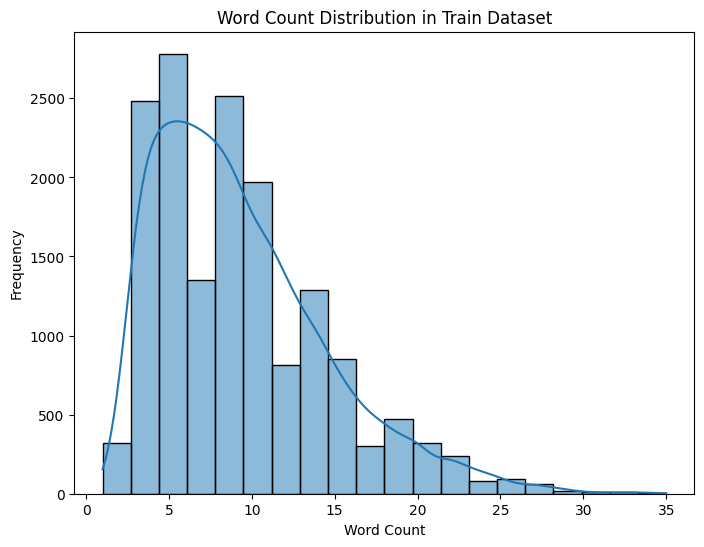

In [ ]:
df_train['word_count'] = df_train['text'].apply(lambda x: len(str(x).split()))
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='word_count', bins=20, kde=True)
plt.title('Word Count Distribution in Train Dataset')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()

Most Frequent Words: Word cloud of training dataset

In [ ]:
!pip install wordcloud


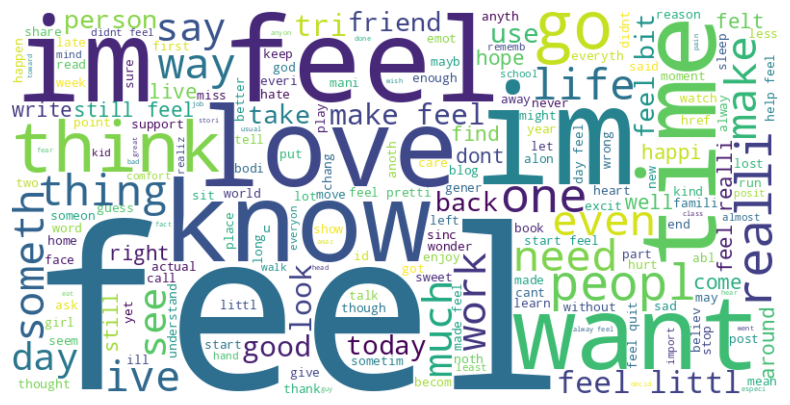

In [ ]:
from collections import Counter

# Combine all text into a single string
all_text = ' '.join(df_train['text'])
# create word cloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
#plt.title('Word Cloud of Train Dataset')
plt.show()

Frequent Words by class : comparaing top words per label to see which words are strongly associated with each class

In [ ]:
from collections import Counter

def top_words_by_class (df, label_col, text_col, n=10):
  for label in df[label_col].unique():
    words = " ".join(df[df[label_col]==label][text_col]).split()
    most_common = Counter(words).most_common(n)
    print(f"Top {n} words for {label}: {most_common}")

top_words_by_class(df_train, 'label', 'text')


Top 10 words for sadness: [('feel', 4994), ('like', 881), ('im', 683), ('know', 297), ('get', 284), ('realli', 276), ('time', 271), ('make', 245), ('want', 244), ('go', 235)]
Top 10 words for anger: [('feel', 2261), ('like', 391), ('im', 342), ('get', 175), ('time', 140), ('want', 133), ('irrit', 128), ('realli', 124), ('know', 122), ('hate', 113)]
Top 10 words for love: [('feel', 1406), ('like', 366), ('love', 277), ('im', 193), ('support', 103), ('realli', 92), ('know', 89), ('want', 89), ('time', 82), ('care', 82)]
Top 10 words for surprise: [('feel', 601), ('amaz', 107), ('like', 92), ('im', 91), ('impress', 63), ('overwhelm', 58), ('weird', 57), ('surpris', 56), ('curiou', 54), ('funni', 49)]
Top 10 words for fear: [('feel', 2025), ('im', 322), ('like', 264), ('littl', 149), ('go', 139), ('know', 136), ('bit', 118), ('want', 113), ('time', 110), ('get', 107)]
Top 10 words for joy: [('feel', 5674), ('like', 1023), ('im', 799), ('make', 381), ('time', 334), ('get', 322), ('go', 315)

Sentiment Visualization

In [ ]:
! pip install textblob

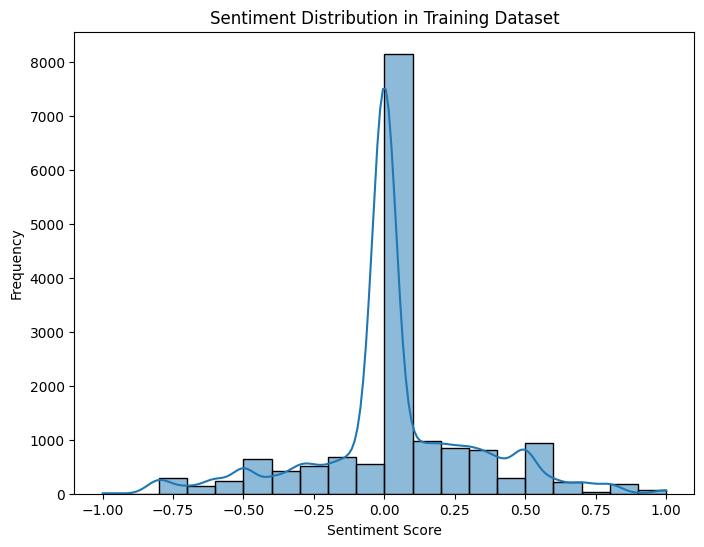

In [ ]:
from textblob import TextBlob

df_train['sentiment'] = df_train['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.histplot(data=df_train, x='sentiment', bins=20, kde=True)
plt.title('Sentiment Distribution in Training Dataset')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

#Feature Engineering and Word Embedding
Transformations that learn something from the data (TF-IDF, vocabulary building, scalers) →

Fit on train only,

Apply to val/test using the learned mapping.

In [ ]:
# TF- IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(df_train['text'])
tfidf_test = tfidf_vectorizer.transform(df_test['text'])
tfidf_val = tfidf_vectorizer.transform(df_val['text'])




In [ ]:
# converts to dataframe
df_train_tfidf = pd.DataFrame(tfidf_train.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
print(df_train_tfidf)

        aa  aaaaaaand  aaaaand  aaaand  aac  aahhh  aaron   ab  abandon  abat  \
0      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
1      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
2      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
3      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
4      0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
...    ...        ...      ...     ...  ...    ...    ...  ...      ...   ...   
15995  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15996  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15997  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15998  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   
15999  0.0        0.0      0.0     0.0  0.0    0.0    0.0  0.0      0.0   0.0   

       ...  zombi  zone  zo

In [ ]:
# prepararing data for modelling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train['label'] = le.fit_transform(df_train['label'])
df_test['label'] = le.transform(df_test['label'])
df_val['label'] = le.transform(df_val['label'])


In [ ]:
#spillting data into x and y
X_train = tfidf_train
y_train = df_train['label']
X_test = tfidf_test
y_test = df_test['label']
X_val = tfidf_val
y_val = df_val['label']

Importing the machine learning models and fitting the data

In [ ]:
! pip install xgboost

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report

for model in [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), XGBClassifier(), SGDClassifier(), MultinomialNB(), KNeighborsClassifier()]:
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print("Model Test accuracy")
  print(f"{type(model).__name__}:{accuracy_score(y_test, y_pred)}")


Model Test accuracy
LogisticRegression:0.8415
Model Test accuracy
DecisionTreeClassifier:0.7965
Model Test accuracy
RandomForestClassifier:0.849
Model Test accuracy
SVC:0.839
Model Test accuracy
XGBClassifier:0.851
Model Test accuracy
SGDClassifier:0.863
Model Test accuracy
MultinomialNB:0.688
Model Test accuracy
KNeighborsClassifier:0.7545


| **Model**                  | **Test Accuracy** |
|----------------------------|-------------------|
| Logistic Regression        | 0.8415            |
| Decision Tree Classifier   | 0.7885            |
| Random Forest Classifier   | 0.8555            |
| SVC (Support Vector Classifier) | 0.839       |
| XGB Classifier             | 0.851             |
| SGD Classifier             | **0.863**         |
| Multinomial NB             | 0.688             |
| KNeighbors Classifier      | 0.7555            |



AS SGD Classifier giving me very good accuracy among all the models, so I am doing hyperparameter tuning to improve it further.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import SGDClassifier
import numpy as np

# Define hyperparameter distributions
param_dist = {
    'loss': ['hinge', 'log_loss'],            # hinge = SVM, log_loss = logistic regression
    'alpha': np.logspace(-4, -2, 10),         # Regularization strength (random values between 1e-4 and 1e-2)
    'penalty': ['l2', 'elasticnet'],          # Regularization type
    'learning_rate': ['optimal', 'adaptive'], # Learning rate schedule
    'eta0': np.linspace(0.001, 0.01, 5)       # Initial learning rate
}

# Initialize SGD Classifier
sgd_clf = SGDClassifier(random_state=42)

# Randomized Search
random_search = RandomizedSearchCV(
    estimator=sgd_clf,
    param_distributions=param_dist,
    n_iter=20,                # Number of random combinations to try
    scoring='accuracy',
    cv=5,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best Parameters
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)




Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': np.float64(0.01), 'alpha': np.float64(0.0001)}
Best Score: 0.8643750000000001


In [ ]:
# check best model
print("Best Parameters", random_search.best_params_)
print("Best CV Accuracy", random_search.best_score_)

Best Parameters {'penalty': 'elasticnet', 'loss': 'hinge', 'learning_rate': 'optimal', 'eta0': np.float64(0.01), 'alpha': np.float64(0.0001)}
Best CV Accuracy 0.8643750000000001


In [ ]:

# Evaluate on Test set
SGD_random_search = random_search.best_estimator_
y_pred = SGD_random_search.predict(X_test)
print("Test Accuracy", accuracy_score(y_test, y_pred))
print("Classification Report")
print(classification_report(y_test, y_pred))
# Confusion Matrix


Test Accuracy 0.8675
Classification Report
              precision    recall  f1-score   support

           0       0.86      0.87      0.86       275
           1       0.87      0.82      0.84       224
           2       0.87      0.94      0.90       695
           3       0.84      0.57      0.68       159
           4       0.90      0.91      0.90       581
           5       0.69      0.65      0.67        66

    accuracy                           0.87      2000
   macro avg       0.84      0.79      0.81      2000
weighted avg       0.87      0.87      0.86      2000



Observations:
 1. Class 3 and class 5 having low recall compared to the other classes so model struggles to detect class 3 and class 5 that might be due to low support of 159 and 66 compared to other classes, it's a class imbalance.

 2. Macro average recall (0.79) is much lower than the weighted recall (0.87), confirming imbalance.

Confusion Matrix


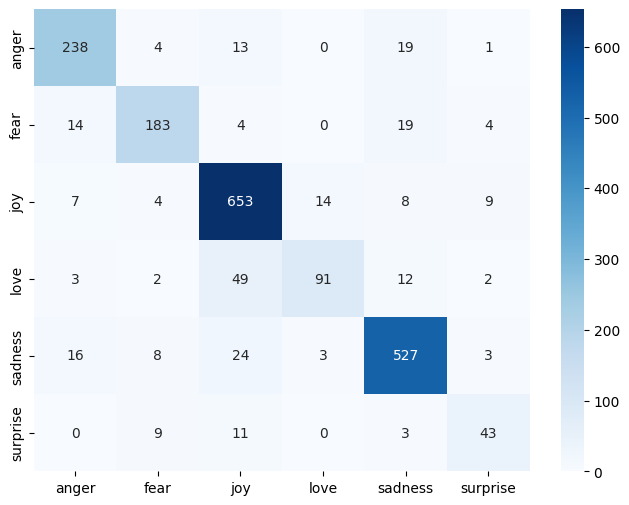

In [ ]:
# import confusion matrix
from sklearn.metrics import confusion_matrix
# confusion matrix in blue grid
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.show()


In [ ]:
# simple function to compare test accuracy, precision, recall, F1 score for the models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    # Get predicted probabilities
    y_pred_prob = model.predict(X_test)

    # Check if it's 2D (probabilities from Keras) or 1D (sklearn labels)
    if len(y_pred_prob.shape) > 1:
        # Keras model → convert probabilities to class labels
        y_pred = np.argmax(y_pred_prob, axis=1)
    else:
        # Sklearn model → already labels
        y_pred = y_pred_prob

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1


In [ ]:
# simple function to compare test accuracy, precision, recall, F1 score for the models

def evaluate_multiple_models(models, X_test, y_test):
    """Evaluate multiple models and return results as a DataFrame."""
    results = []

    for name, model in models:
        accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)

        results.append({
            'Model': name,  # Get model class name
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1
        })

    # Convert list of dictionaries to DataFrame
    df_results = pd.DataFrame(results)
    return df_results





In [ ]:
models = [("SGD_random_search_final",SGD_random_search)]  # Replace with your actual trained models

df_results_to_do_strings = evaluate_multiple_models(models, X_test, y_test)
print(df_results_to_do_strings)

                     Model  Accuracy  Precision  Recall  F1 Score
0  SGD_random_search_final    0.8675   0.866504  0.8675  0.864297


c) Using the same Emotions Dataset for NLP from the Kaggle link in above question, now approach the problem using deep learning and transformer-based models. Perform the following steps:

i. Download the dataset from above link and load it in your Python environment.

ii. Perform the data cleaning like stopwords removal, lowercase, stemming, lemmatization etc.

iii. Use DL models like Simple RNN, LSTM, GRU, Bidirectional RNN/LSTM/GRU, Stacked RNN/LSTM/GRU

iv. Use the KerasTuner to tune the parameters.

v. Now use the pretrained models – BERT, DistilBERT, RoBERTa

vi. Check for overfitting and underfitting

vii. Finally create a table to compare the performances of all the models and suggest the best model

Now using the DL models to fit the data

Simple RNN

In [ ]:
!pip install tensorflow

In [ ]:
# simple RNN
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Dropout


In [ ]:
max_words = 20000 # Vocabulary size
max_len = 17   # max length for padding

# Tokenize Text: Maps words → unique integer indices
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")

# fit only on training data: Build word index only from training set
tokenizer.fit_on_texts(df_train['text'])

# Convert text to sequences: Converts sentences → integer sequences
X_train_seq = tokenizer.texts_to_sequences(df_train['text'])
X_test_seq = tokenizer.texts_to_sequences(df_test['text'])
X_val_seq = tokenizer.texts_to_sequences(df_val['text'])

# Pad sequence: Ensures all sequences have same length
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post')
X_val_pad = pad_sequences(X_val_seq, maxlen=max_len, padding='post')

# Step1 : Build RNN model
rnn_model = Sequential()
rnn_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
rnn_model.add(SimpleRNN(units=128))
Dropout(0.5)
rnn_model.add(Dense(units=len(le.classes_), activation='softmax'))

rnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
import numpy as np
sentence_lengths = [len(seq) for seq in X_train_seq]
print(np.percentile(sentence_lengths, [50,76,90,95]))

[ 8. 12. 17. 20.]


In [ ]:
history= rnn_model.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 15s 18ms/step - accuracy: 0.4903 - loss: 1.3242 - val_accuracy: 0.7745 - val_loss: 0.7199
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8443 - loss: 0.4755 - val_accuracy: 0.8125 - val_loss: 0.5969
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9245 - loss: 0.2305 - val_accuracy: 0.7870 - val_loss: 0.6934
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9509 - loss: 0.1608 - val_accuracy: 0.7950 - val_loss: 0.7145
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9635 - loss: 0.1159 - val_accuracy: 0.7820 - val_loss: 0.7766
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - accuracy: 0.9767 - loss: 0.0803 - val_accuracy: 0.7775 - val_loss: 0.8589
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9799 - loss: 0.0665 - val_accuracy: 0.7475 - val_loss: 1.0261
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 13ms/step - accuracy: 0.9736 - loss: 0.0900 - val_accuracy

In [ ]:
models = [("SimpleRNN",rnn_model),]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7265   0.737726  0.7265  0.730093


LSTM

In [ ]:
# LSTM Model
lstm_model = Sequential()
lstm_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(units=len(le.classes_), activation='softmax'))

lstm_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history1 = lstm_model.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))


Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.3579 - loss: 1.4835 - val_accuracy: 0.7530 - val_loss: 0.6892
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8509 - loss: 0.4438 - val_accuracy: 0.8770 - val_loss: 0.3626
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9353 - loss: 0.2128 - val_accuracy: 0.8790 - val_loss: 0.3588
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9513 - loss: 0.1464 - val_accuracy: 0.8750 - val_loss: 0.3889
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9614 - loss: 0.1095 - val_accuracy: 0.8745 - val_loss: 0.4271
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9687 - loss: 0.0922 - val_accuracy: 0.8760 - val_loss: 0.4614
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9771 - loss: 0.0699 - val_accuracy: 0.8610 - val_loss: 0.5469
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9784 - loss: 0.0620 - val_accuracy: 0

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7265   0.737726  0.7265  0.730093
1       LSTM    0.8685   0.870269  0.8685  0.869070


GRU

In [ ]:
# GRU Model
gru_model = Sequential()
gru_model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
gru_model.add(GRU(128, dropout=0, recurrent_dropout=0))
gru_model.add(Dropout(0.5))
gru_model.add(Dense(len(le.classes_), activation='softmax'))

gru_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history2 = gru_model.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3615 - loss: 1.5017 - val_accuracy: 0.7665 - val_loss: 0.6625
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8292 - loss: 0.5134 - val_accuracy: 0.8835 - val_loss: 0.3384
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9293 - loss: 0.2057 - val_accuracy: 0.8870 - val_loss: 0.3276
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9527 - loss: 0.1283 - val_accuracy: 0.8860 - val_loss: 0.3625
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9656 - loss: 0.0992 - val_accuracy: 0.8815 - val_loss: 0.3839
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9727 - loss: 0.0731 - val_accuracy: 0.8920 - val_loss: 0.3933
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9780 - loss: 0.0592 - val_accuracy: 0.8845 - val_loss: 0.4468
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9844 - loss: 0.0430 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
       Model  Accuracy  Precision  Recall  F1 Score
0  SimpleRNN    0.7265   0.737726  0.7265  0.730093
1       LSTM    0.8685   0.870269  0.8685  0.869070
2        GRU    0.8730   0.873294  0.8730  0.872417


Bidirectional RNN, LSTM, GRU

In [ ]:
# Bidirectional RNN
from tensorflow.keras.layers import Bidirectional

bidirectional_rnn = Sequential()
bidirectional_rnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_rnn.add(Bidirectional(SimpleRNN(units=128)))
Dropout(0.5)
bidirectional_rnn.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history3 = bidirectional_rnn.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.4648 - loss: 1.3701 - val_accuracy: 0.7775 - val_loss: 0.6817
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8632 - loss: 0.4099 - val_accuracy: 0.7850 - val_loss: 0.6487
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9458 - loss: 0.1707 - val_accuracy: 0.8025 - val_loss: 0.6620
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9703 - loss: 0.0955 - val_accuracy: 0.7945 - val_loss: 0.7023
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9806 - loss: 0.0654 - val_accuracy: 0.7785 - val_loss: 0.8210
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9842 - loss: 0.0541 - val_accuracy: 0.7840 - val_loss: 0.8539
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9878 - loss: 0.0419 - val_accuracy: 0.7870 - val_loss: 0.8856
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9851 - loss: 0.0510 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("BidirectionalRNN",bidirectional_rnn)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
              Model  Accuracy  Precision  Recall  F1 Score
0         SimpleRNN    0.7265   0.737726  0.7265  0.730093
1              LSTM    0.8685   0.870269  0.8685  0.869070
2               GRU    0.8730   0.873294  0.8730  0.872417
3  BidirectionalRNN    0.7545   0.751451  0.7545  0.751468


Bidirectional LSTM

In [ ]:
# Bidirectional LSTM
from tensorflow.keras.layers import Bidirectional

bidirectional_lstm = Sequential()
bidirectional_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_lstm.add(Bidirectional(LSTM(units=128)))
Dropout(0.5)
bidirectional_lstm.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history4 = bidirectional_lstm.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.4896 - loss: 1.2787 - val_accuracy: 0.8725 - val_loss: 0.3618
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9116 - loss: 0.2493 - val_accuracy: 0.8820 - val_loss: 0.3253
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9526 - loss: 0.1306 - val_accuracy: 0.8815 - val_loss: 0.3425
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9673 - loss: 0.0885 - val_accuracy: 0.8735 - val_loss: 0.3838
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9745 - loss: 0.0679 - val_accuracy: 0.8750 - val_loss: 0.4233
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9788 - loss: 0.0541 - val_accuracy: 0.8740 - val_loss: 0.4390
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9831 - loss: 0.0464 - val_accuracy: 0.8735 - val_loss: 0.4958
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9858 - loss: 0.0395 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335


In [ ]:
# Bidirectional GRU
from tensorflow.keras.layers import Bidirectional

bidirectional_gru = Sequential()
bidirectional_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
bidirectional_gru.add(Bidirectional(GRU(units=128)))
Dropout(0.5)
bidirectional_gru.add(Dense(units=len(le.classes_), activation='softmax'))

bidirectional_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history5 = bidirectional_gru.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.5146 - loss: 1.2378 - val_accuracy: 0.8675 - val_loss: 0.3627
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9068 - loss: 0.2478 - val_accuracy: 0.8890 - val_loss: 0.2851
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9499 - loss: 0.1305 - val_accuracy: 0.8855 - val_loss: 0.3259
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9678 - loss: 0.0865 - val_accuracy: 0.8955 - val_loss: 0.3509
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9805 - loss: 0.0569 - val_accuracy: 0.8915 - val_loss: 0.3817
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9861 - loss: 0.0422 - val_accuracy: 0.8865 - val_loss: 0.4447
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9855 - loss: 0.0401 - val_accuracy: 0.8900 - val_loss: 0.4666
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9888 - loss: 0.0312 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),("Bidirectional_GRU",bidirectional_gru)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335
5   Bidirectional_GRU    0.8685   0.872105  0.8685  0.869836


Stacked RNN

In [ ]:
# Stacked RNN

stacked_rnn = Sequential()
stacked_rnn.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_rnn.add(SimpleRNN(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_rnn.add(SimpleRNN(units=64))

Dropout(0.5)
stacked_rnn.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history6 = stacked_rnn.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4628 - loss: 1.4064 - val_accuracy: 0.7875 - val_loss: 0.6619
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8462 - loss: 0.4693 - val_accuracy: 0.7655 - val_loss: 0.7233
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9227 - loss: 0.2430 - val_accuracy: 0.8010 - val_loss: 0.6881
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9532 - loss: 0.1498 - val_accuracy: 0.7905 - val_loss: 0.7259
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9669 - loss: 0.1087 - val_accuracy: 0.7880 - val_loss: 0.7462
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9675 - loss: 0.0981 - val_accuracy: 0.8010 - val_loss: 0.7017
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9734 - loss: 0.0797 - val_accuracy: 0.8080 - val_loss: 0.7737
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9756 - loss: 0.0822 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335
5   Bidirectional_GRU    0.8685   0.872105  0.8685  0.869836
6         Stacked_RNN    0.7865   0.791956  0.7865  0.786894


Stacked LSTM

In [ ]:
# Stacked LSTM

stacked_lstm = Sequential()
stacked_lstm.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_lstm.add(LSTM(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_lstm.add(LSTM(units=64))

Dropout(0.5)
stacked_lstm.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history6 = stacked_lstm.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4545 - loss: 1.3394 - val_accuracy: 0.8390 - val_loss: 0.5272
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8789 - loss: 0.3623 - val_accuracy: 0.8740 - val_loss: 0.3715
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9303 - loss: 0.2044 - val_accuracy: 0.8760 - val_loss: 0.3701
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9524 - loss: 0.1381 - val_accuracy: 0.8790 - val_loss: 0.3403
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9684 - loss: 0.0899 - val_accuracy: 0.8780 - val_loss: 0.4140
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9728 - loss: 0.0724 - val_accuracy: 0.8720 - val_loss: 0.4305
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9777 - loss: 0.0588 - val_accuracy: 0.8675 - val_loss: 0.4851
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9782 - loss: 0.0504 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335
5   Bidirectional_GRU    0.8685   0.872105  0.8685  0.869836
6         Stacked_RNN    0.7865   0.791956  0.7865  0.786894
7        Stacked_LSTM    0.8585   0.863558  0.8585  0.860040


Stacked GRU

In [ ]:
# Stacked GRU

stacked_gru = Sequential()
stacked_gru.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
# First RNN layer (must return sequences for the next RNN layer)
stacked_gru.add(GRU(units=128, return_sequences=True))

# Second RNN layer (final one, return_sequences=False by default)
stacked_gru.add(GRU(units=64))

Dropout(0.5)
stacked_gru.add(Dense(units=len(le.classes_), activation='softmax'))

stacked_gru.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
history7 = stacked_gru.fit(X_train_pad, y_train, epochs=15, batch_size=32, validation_data=(X_val_pad, y_val))

Epoch 1/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.4053 - loss: 1.4272 - val_accuracy: 0.8710 - val_loss: 0.4027
Epoch 2/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8973 - loss: 0.2981 - val_accuracy: 0.8900 - val_loss: 0.3063
Epoch 3/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9445 - loss: 0.1512 - val_accuracy: 0.8885 - val_loss: 0.3198
Epoch 4/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9575 - loss: 0.1042 - val_accuracy: 0.8895 - val_loss: 0.3373
Epoch 5/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9694 - loss: 0.0756 - val_accuracy: 0.8795 - val_loss: 0.4013
Epoch 6/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9775 - loss: 0.0557 - val_accuracy: 0.8855 - val_loss: 0.4574
Epoch 7/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9804 - loss: 0.0501 - val_accuracy: 0.8865 - val_loss: 0.4654
Epoch 8/15
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9843 - loss: 0.0387 - val_accuracy: 0.

In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm),("Stacked_GRU",stacked_gru)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335
5   Bidirectional_GRU    0.8685   0.872105  0.8685  0.869836
6         Stacked_RNN    0.7865   0.791956  0.7865  0.786894
7        Stacked_LSTM    0.8585   0.863558  0.8585  0.860040
8         Stacked_GRU    0.8695   0.868618  0.8695  0.868428


Using Keras Tuner to tune the parameters

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Keras tuner
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner import RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.optimizers import Adam




def build_stacked_gru_model(hp):
    model = Sequential()

    # Embedding layer
    model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))

    # First GRU layer
    model.add(GRU(
        units=hp.Int('gru_units_1', min_value=32, max_value=256, step=32),
        return_sequences=True,   # Needed to stack another GRU layer
        dropout=hp.Float('dropout_gru_1', 0.2, 0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_gru_1', 0.0, 0.3, step=0.1)
    ))

    # Second GRU layer
    model.add(GRU(
        units=hp.Int('gru_units_2', min_value=32, max_value=256, step=32),
        dropout=hp.Float('dropout_gru_2', 0.2, 0.5, step=0.1),
        recurrent_dropout=hp.Float('recurrent_dropout_gru_2', 0.0, 0.3, step=0.1)
    ))

    # Dropout before output
    model.add(Dropout(hp.Float('dropout_final', 0.2, 0.5, step=0.1)))

    # Output layer
    model.add(Dense(len(le.classes_), activation='softmax'))

    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model




In [ ]:
tuner = kt.RandomSearch(
    build_stacked_gru_model,
    objective='val_accuracy',
    max_trials=5,                 # Number of different hyperparameter combinations to try
    executions_per_trial=1,       # Runs each trial once
    directory='tuner_results',
    project_name='stacked_gru_tuning'
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
tuner.search(
    X_train_pad, y_train,
    epochs=15,
    validation_data=(X_val_pad, y_val),
    verbose=1

)

Trial 5 Complete [00h 05m 23s]
val_accuracy: 0.8895000219345093

Best val_accuracy So Far: 0.8899999856948853
Total elapsed time: 00h 34m 42s


In [ ]:
# Get the best model
Tuned_stacked_GRU = tuner.get_best_models(num_models=1)[0]

# Evaluate on test data
loss, accuracy = Tuned_stacked_GRU.evaluate(X_test_pad, y_test)
print(f"Best Model Test Accuracy: {accuracy:.4f}")

# Best hyperparameters
best_hyperparams = tuner.get_best_hyperparameters(1)[0]
print("Best Hyperparameters:")
print(f"First GRU units: {best_hyperparams.get('gru_units_1')}")
print(f"Second GRU units: {best_hyperparams.get('gru_units_2')}")
print(f"Dropout final: {best_hyperparams.get('dropout_final')}")
print(f"Learning Rate: {best_hyperparams.get('learning_rate')}")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 20 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.8886 - loss: 0.3319
Best Model Test Accuracy: 0.8865
Best Hyperparameters:
First GRU units: 128
Second GRU units: 160
Dropout final: 0.4
Learning Rate: 0.01


In [ ]:
models = [("SimpleRNN",rnn_model),("LSTM",lstm_model),("GRU",gru_model),("Bidirectional_RNN",bidirectional_rnn),("Bidirectional_LSTM",bidirectional_lstm),
 ("Bidirectional_GRU",bidirectional_gru),("Stacked_RNN",stacked_rnn),("Stacked_LSTM",stacked_lstm),("Stacked_GRU",stacked_gru),("Tuned_Stacked_GRU",Tuned_stacked_GRU)]

df_results_to_do_strings = evaluate_multiple_models(models, X_test_pad, y_test)
print(df_results_to_do_strings)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step
                Model  Accuracy  Precision  Recall  F1 Score
0           SimpleRNN    0.7265   0.737726  0.7265  0.730093
1                LSTM    0.8685   0.870269  0.8685  0.869070
2                 GRU    0.8730   0.873294  0.8730  0.872417
3   Bidirectional_RNN    0.7545   0.751451  0.7545  0.751468
4  Bidirectional_LSTM    0.8590   0.861789  0.8590  0.859335
5   Bidirectional_GRU    0.8685   0.872105  0.8685  0.869836
6         Stacked_RNN    0.7865   0.791956  0.7865  0.786894
7        Stacked_LSTM    0.8585   0.863558  0.8585  0.860040
8         Stacked_GRU    0.8695   0.868618  0.8695  0.86842

Deep learning model summary

| Model               | Accuracy | Precision | Recall | F1 Score |
| ------------------- | -------- | --------- | ------ | -------- |
| SimpleRNN           | 0.7535   | 0.750218  | 0.7535 | 0.749692 |
| LSTM                | 0.8550   | 0.856740  | 0.8550 | 0.855591 |
| GRU                 | 0.8600   | 0.861677  | 0.8600 | 0.860515 |
| Bidirectional\_RNN  | 0.7245   | 0.759315  | 0.7245 | 0.736502 |
| Bidirectional\_LSTM | 0.8540   | 0.854798  | 0.8540 | 0.853602 |
| Bidirectional\_GRU  | 0.8690   | 0.871020  | 0.8690 | 0.869752 |
| Stacked\_RNN        | 0.7835   | 0.781538  | 0.7835 | 0.779159 |
| Stacked\_LSTM       | 0.8595   | 0.859532  | 0.8595 | 0.859006 |
| Stacked\_GRU        | 0.8635   | 0.870526  | 0.8635 | 0.864975 |
| Tuned\_Stacked\_GRU | 0.8895   | 0.892192  | 0.8895 | 0.890206 |


#Now use the pretrained models – BERT, DistilBERT, RoBERTa

In [ ]:
 #connecting to the kaggle by using API token
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
# Loading the data from kaggle
!kaggle datasets download -d praveengovi/emotions-dataset-for-nlp

Dataset URL: https://www.kaggle.com/datasets/praveengovi/emotions-dataset-for-nlp
License(s): CC-BY-SA-4.0
  0% 0.00/721k [00:00<?, ?B/s]
100% 721k/721k [00:00<00:00, 265MB/s]


In [ ]:
# unzipping the data
!unzip emotions-dataset-for-nlp.zip

Archive:  emotions-dataset-for-nlp.zip
  inflating: test.txt                
  inflating: train.txt               
  inflating: val.txt                 


In [ ]:
import pandas as pd
import numpy as np

# Read the file WITHOUT header
df_train_raw = pd.read_csv("/content/train.txt", sep=';', header=None)
df_test_raw = pd.read_csv("/content/test.txt", sep=';', header=None)
df_val_raw = pd.read_csv("/content/val.txt", sep=';', header=None)

# Manually assign column names
df_train_raw.columns = ['text', 'true_label']
df_test_raw.columns = ['text', 'true_label']
df_val_raw.columns = ['text', 'true_label']

# Display
df_test_raw.head()

,text,true_label
0,im feeling rather rotten so im not very ambiti...,sadness
1,im updating my blog because i feel shitty,sadness
2,i never make her separate from me because i do...,sadness
3,i left with my bouquet of red and yellow tulip...,joy
4,i was feeling a little vain when i did this one,sadness


BERT Model

In [ ]:
from transformers import AutoTokenizer, TFBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset1 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset1   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset1  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
bert_model = TFBertForSequenceClassification.from_pretrained(
    "bert-base-uncased",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
bert_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# =============================
# 8. Train the model
# =============================
history = bert_model.fit(
    train_dataset1,
    validation_data=val_dataset1,
    epochs=3
)

# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = bert_model.evaluate(test_dataset1)
print(f"\nTest Accuracy: {test_acc:.4f}")




Number of Classes: 6


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.


pytorch_model.bin:   0%|          | 0.00/440M [00:00<?, ?B/s]

TensorFlow and JAX classes are deprecated and will be removed in Transformers v5. We recommend migrating to PyTorch classes or pinning your version of Transformers.
All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
500/500 [==============================] - 453s 865ms/step - loss: 0.7272 - accuracy: 0.7214 - val_loss: 0.1810 - val_accuracy: 0.9315
Epoch 2/3
500/500 [==============================] - 422s 844ms/step - loss: 0.1353 - accuracy: 0.9433 - val_loss: 0.1368 - val_accuracy: 0.9355
Epoch 3/3
63/63 [==============================] - 18s 281ms/step - loss: 0.1423 - accuracy: 0.9280

Test Accuracy: 0.9280


DistilBERT

In [ ]:
from transformers import AutoTokenizer, TFDistilBertForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset2 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset2   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset2  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
Distil_model = TFDistilBertForSequenceClassification.from_pretrained(
    "distilbert-base-uncased",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
Distil_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# =============================
# 8. Train the model
# =============================
history = Distil_model.fit(
    train_dataset2,
    validation_data=val_dataset2,
    epochs=3
)

# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = Distil_model.evaluate(test_dataset2)
print(f"\nTest Accuracy: {test_acc:.4f}")





Number of Classes: 6


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_layer_norm.bias', 'vocab_layer_norm.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_transform.bias']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'cla

Epoch 1/3
500/500 [==============================] - 223s 429ms/step - loss: 0.6322 - accuracy: 0.7748 - val_loss: 0.1704 - val_accuracy: 0.9380
Epoch 2/3
500/500 [==============================] - 213s 425ms/step - loss: 0.1415 - accuracy: 0.9409 - val_loss: 0.1299 - val_accuracy: 0.9395
Epoch 3/3
63/63 [==============================] - 9s 140ms/step - loss: 0.1397 - accuracy: 0.9260

Test Accuracy: 0.9260


Roberta

In [ ]:
from transformers import AutoTokenizer, TFRobertaForSequenceClassification
from transformers import create_optimizer
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import numpy as np

# =============================
# 1. Encode labels
# =============================
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])

num_classes = len(le.classes_)
print(f"Number of Classes: {num_classes}")

# =============================
# 2. Tokenizer
# =============================
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize_texts(texts, max_len=128):
    return tokenizer(
        texts.tolist(),
        truncation=True,
        padding='max_length',
        max_length=max_len,
        return_tensors='tf'
    )

train_encodings = tokenize_texts(df_train_raw['text'], max_len=128)
val_encodings   = tokenize_texts(df_val_raw['text'], max_len=128)
test_encodings  = tokenize_texts(df_test_raw['text'], max_len=128)

# =============================
# 3. tf.data pipeline
# =============================
def create_tf_dataset(encodings, labels, shuffle=False, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((dict(encodings), labels))
    if shuffle:
        dataset = dataset.shuffle(buffer_size=1000)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset3 = create_tf_dataset(train_encodings, df_train_raw['true_label'].values, shuffle=True)
val_dataset3   = create_tf_dataset(val_encodings, df_val_raw['true_label'].values)
test_dataset3  = create_tf_dataset(test_encodings, df_test_raw['true_label'].values)

# =============================
# 4. Build BERT Model
# =============================
Roberta_model = TFRobertaForSequenceClassification.from_pretrained(
    "roberta-base",
    num_labels=num_classes,
    from_pt=True
)

# =============================
# 5. Optimizer (AdamW with linear decay)
# =============================
batch_size = 32
num_train_steps = int(len(df_train_raw) / batch_size * 3)  # 3 epochs
optimizer, lr_schedule = create_optimizer(
    init_lr=3e-5,  # Start with a slightly higher LR
    num_warmup_steps=0.1 * num_train_steps,  # Warmup helps stability
    num_train_steps=num_train_steps,
    weight_decay_rate=0.01
)

# =============================
# 6. Compile the model
# =============================
Roberta_model.compile(
    optimizer=optimizer,
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)
# =============================
# 8. Train the model
# =============================
history = Roberta_model.fit(
    train_dataset3,
    validation_data=val_dataset3,
    epochs=3
)
# =============================
# 9. Evaluate on test data
# =============================
test_loss, test_acc = Roberta_model.evaluate(test_dataset3)
print(f"\nTest Accuracy: {test_acc:.4f}")



Number of Classes: 6


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

All PyTorch model weights were used when initializing TFRobertaForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFRobertaForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/3
500/500 [==============================] - 446s 857ms/step - loss: 0.6290 - accuracy: 0.7751 - val_loss: 0.1769 - val_accuracy: 0.9270
Epoch 2/3
500/500 [==============================] - 424s 849ms/step - loss: 0.1571 - accuracy: 0.9337 - val_loss: 0.1416 - val_accuracy: 0.9300
Epoch 3/3
63/63 [==============================] - 17s 266ms/step - loss: 0.1368 - accuracy: 0.9350

Test Accuracy: 0.9350


In [ ]:
# prepararing data for modelling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train_raw['true_label'] = le.fit_transform(df_train_raw['true_label'])
df_test_raw['true_label'] = le.transform(df_test_raw['true_label'])
df_val_raw['true_label'] = le.transform(df_val_raw['true_label'])

In [ ]:
#spillting data into x and y

y_train = df_train_raw['true_label']

y_test = df_test_raw['true_label']

y_val = df_val_raw['true_label']

In [ ]:
# simple function to compare test accuracy, precision, recall, F1 score for the models
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model(model, X_test, y_test):
    # Get predicted probabilities
    y_pred_prob = model.predict(X_test)



    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

In [ ]:

import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import tensorflow as tf

# ================================
# 1. Evaluation Function
# ================================
def evaluate_model(y_true, y_pred):
    """
    Evaluate model predictions using accuracy, precision, recall, and F1-score.
    """
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    return accuracy, precision, recall, f1


# ================================
# 2. Get Predictions from Transformer Models
# ================================
# BERT
y_pred_bert = tf.argmax(bert_model.predict(test_dataset1).logits, axis=1).numpy()

# DistilBERT
y_pred_distilbert = tf.argmax(Distil_model.predict(test_dataset2).logits, axis=1).numpy()

# RoBERTa
y_pred_roberta = tf.argmax(Roberta_model.predict(test_dataset3).logits, axis=1).numpy()

# ================================
# 3. Extract True Labels (y_test)
# ================================
# If test_dataset1 is a tf.data.Dataset
y_test = []
for _, labels in test_dataset1:
    y_test.extend(labels.numpy())
y_test = np.array(y_test)

# ================================
# 4. Evaluate Each Transformer Model
# ================================
bert_metrics = evaluate_model(y_test, y_pred_bert)
distilbert_metrics = evaluate_model(y_test, y_pred_distilbert)
roberta_metrics = evaluate_model(y_test, y_pred_roberta)

# ================================
# 5. Store Results in a DataFrame
# ================================
transformer_results = [
    {
        'Model': 'BERT',
        'Accuracy': bert_metrics[0],
        'Precision': bert_metrics[1],
        'Recall': bert_metrics[2],
        'F1 Score': bert_metrics[3]
    },
    {
        'Model': 'DistilBERT',
        'Accuracy': distilbert_metrics[0],
        'Precision': distilbert_metrics[1],
        'Recall': distilbert_metrics[2],
        'F1 Score': distilbert_metrics[3]
    },
    {
        'Model': 'RoBERTa',
        'Accuracy': roberta_metrics[0],
        'Precision': roberta_metrics[1],
        'Recall': roberta_metrics[2],
        'F1 Score': roberta_metrics[3]
    }
]

df_transformer_results = pd.DataFrame(transformer_results)

# Display Results
print(df_transformer_results.to_string(index=False))


63/63 [==============================] - 17s 270ms/step
     Model  Accuracy  Precision  Recall  F1 Score
      BERT     0.928   0.929802   0.928  0.928611
DistilBERT     0.926   0.927981   0.926  0.926587
   RoBERTa     0.935   0.937530   0.935  0.935407


Now, I will check for overfitting and underfitting in the models and finally create a table to compare the performances of all the models and suggest the best model.

Final summary

### **1. Classical ML Model Results**

| Model                  | Accuracy | Precision | Recall | F1 Score |
|-----------------------|----------|-----------|--------|----------|
| SGD_random_search_final | 0.8675   | 0.866504  | 0.8675 | 0.864297 |

---

### **2. RNN and Variants Performance**

| Model              | Accuracy | Precision | Recall | F1 Score |
|--------------------|----------|-----------|--------|----------|
| SimpleRNN          | 0.7265   | 0.737726  | 0.7265 | 0.730093 |
| LSTM               | 0.8685   | 0.870269  | 0.8685 | 0.869070 |
| GRU                | 0.8730   | 0.873294  | 0.8730 | 0.872417 |
| Bidirectional_RNN  | 0.7545   | 0.751451  | 0.7545 | 0.751468 |
| Bidirectional_LSTM | 0.8590   | 0.861789  | 0.8590 | 0.859335 |
| Bidirectional_GRU  | 0.8685   | 0.872105  | 0.8685 | 0.869836 |
| Stacked_RNN        | 0.7865   | 0.791956  | 0.7865 | 0.786894 |
| Stacked_LSTM       | 0.8585   | 0.863558  | 0.8585 | 0.860040 |
| Stacked_GRU        | 0.8695   | 0.868618  | 0.8695 | 0.868428 |

---

### **3. Transformer Model Performance**

| Model      | Accuracy | Precision | Recall | F1 Score |
|------------|----------|-----------|--------|----------|
| BERT       | 0.928    | 0.929802  | 0.928  | 0.928611 |
| DistilBERT | 0.926    | 0.927981  | 0.926  | 0.926587 |
| RoBERTa    | 0.935    | 0.937530  | 0.935  | 0.935407 |


d) Explain the different types of feature engineering techniques like one hot encoding, bag of words, TFIDF etc. How word2vec is different from them. Explain its working with example.

Feature engineering techniques are used to convert textual data into numerical vectors that machine learning models can understand. These techniques are also called embedding techniques.

1) One-Hot Encoding:
Assigns a 1 if a word is present in the sentence and 0 if not.
Each unique word in the corpus is given a separate position in the vector.
Example:
Sentence: "I love NLP" → [1, 0, 1, 0, ...]
Limitations:
High space complexity: Creates very large and sparse vectors for large vocabularies.
Sparsity: Most values are 0, leading to inefficiency.
Out of Vocabulary (OOV): Cannot handle words that were not present during training.

2) Bag of Words (BoW):
Creates a vocabulary of all unique words in the dataset.
For each sentence, it counts the occurrences of these words.
Example:
Sentences: "I love NLP","NLP is fun"
Vocabulary → {I, love, NLP, is, fun}
Sentence 1 → [1, 1, 1, 0, 0]
Limitations:
Loss of semantic meaning: Ignores the context and order of words.
Sparsity: Large vocabularies create sparse matrices.
OOV problem: Cannot handle unseen words.

3) N-Grams:
Considers sequences of N words together to preserve some context.
Unigram: Single word (e.g., "I", "love")
Bigram: Two consecutive words (e.g., "I love")
Trigram: Three consecutive words (e.g., "I love NLP")
Example:
Sentence: "I love NLP" → Bigrams: ["I love", "love NLP"]
Limitations:
Exponential growth in features: As N increases, feature space grows rapidly.
Still suffers from OOV and sparsity issues.

4) TF-IDF (Term Frequency – Inverse Document Frequency): Assigns weights to words based on:
Term Frequency (TF): Frequency of a word in a document.
Inverse Document Frequency (IDF): How unique or rare the word is across all documents.
Final Score = TF × IDF
Words that are frequent in a single document but rare across the corpus get higher importance.
Example:
Common stop words like "the", "is" will have low scores.
Advantages:
Produces floating-point values rather than just binary counts.
Helps reduce the weight of common, uninformative words.

5) Word2Vec:
A deep learning-based embedding technique that learns word representations in a continuous vector space. Words with similar meanings end up having similar vector representations.
Example:
Vector relationships:
King - Man + Woman ≈ Queen
Advantages:
Captures semantic relationships between words.
Produces dense, low-dimensional vectors, reducing sparsity.